In [2]:
from pathlib import Path
import sys,os
sys.path.append(os.pardir)
from tools.preprocess.common import CommonPreprocessor
from tools.preprocess.interaction_matrix_generator import InteractionMatrixGenerator
from tools.preprocess.bow_vectorizer import BOWVectorizer
from scipy.sparse import csr_matrix

In [3]:
orignal_path=Path("../data/preprocessed_50k.txt")

In [4]:
cp=CommonPreprocessor(split_seed=0)
songs=cp.get_song_list(orignal_path,shuffle=True)

In [5]:
corpus=[song["chords"] for song in songs]

In [6]:
print(corpus[0:2])

[['Dm', 'D#dim', 'Gm', 'D', 'Gm', 'C', 'F', 'A', 'Dm', 'D#dim', 'Gm', 'D', 'Gm', 'Dm', 'A7', 'Dm', 'A', 'Dm', 'im', 'A', 'Dm', 'D7', 'Gm', 'Dm', 'im', 'A', 'Dm', 'im', 'A', 'Dm', 'D7', 'Gm', 'Dm', 'A7', 'Dm', 'F', 'D#dim', 'Gm', 'F#aug', 'A#', 'Em7-5', 'Gm', 'Gm7', 'Gm6', 'Gm7', 'C', 'C/A#', 'F', 'D#dim', 'Gm', 'F#aug', 'A#', 'Em7-5', 'Gm', 'Gm7', 'Gm6', 'Gm7', 'E7', 'A7', 'Dm', 'A#', 'C', 'F', 'A7', 'Dm', 'A#', 'im', 'A7', 'Dm', 'Dm', 'im', 'A', 'Dm', 'D7', 'Gm', 'Dm', 'im', 'A', 'Dm', 'im', 'A', 'Dm', 'D7', 'Gm', 'Dm', 'A7', 'Dm', 'F', 'D#dim', 'Gm', 'F#aug', 'A#', 'Em7-5', 'Gm', 'Gm7', 'Gm6', 'Gm7', 'C', 'C/A#', 'F', 'D#dim', 'Gm', 'F#aug', 'A#', 'Em7-5', 'Gm', 'Gm7', 'Gm6', 'Gm7', 'E7', 'A7', 'Dm', 'A#', 'C', 'F', 'A7', 'Dm', 'A#', 'C#dim', 'A', 'Dm', 'Dm', 'Gm', 'C', 'F', 'Dm', 'Gm', 'A7', 'F#', 'B', 'Em', 'B', 'B7', 'Em', 'E7', 'Am', 'Em', 'B', 'Em', 'G', 'G#dim', 'Am', 'G#aug', 'C', 'F#m7-5', 'Am', 'D', 'G', 'G#dim', 'Am', 'G#aug', 'C', 'F#m7-5', 'C', 'F#', 'B', 'Em', 'C', 'D', 

In [7]:
from gensim.models import word2vec
embedding_dim=100
min_count=5
window_size=5
iter_num=100
#Word2Vecモデルの学習
#sizeは特徴量の数、min_count以下の登場数の単語を無視、前後window幅の単語との関係を考慮、iter回数分繰り返し計算
model = word2vec.Word2Vec(corpus,
                          size=embedding_dim,
                          min_count=min_count,
                          window=window_size,
                          iter=iter_num)

In [22]:
# モデルを保存
model_name=f"../result/w2v/{embedding_dim}_{min_count}_{window_size}_{iter_num}.model"
model.save(model_name)
# モデルを読み込む
#model = word2vec.Word2Vec.load(model_name)

In [8]:
model.wv["C"]

array([ 0.16397743,  0.7332073 ,  2.5704796 ,  2.361219  , -2.4860144 ,
       -1.3689091 , -2.5507064 ,  3.3757603 ,  0.5352692 ,  0.8052814 ,
       -0.3095889 , -3.463783  , -1.052591  ,  2.1935248 , -2.198622  ,
        2.2323647 ,  3.7585995 , -0.9689506 , -1.2977624 , -0.03497463,
       -0.30850303,  0.10176049, -0.7189551 ,  0.2065243 , -1.2454779 ,
        1.20616   ,  1.0331571 ,  0.24479474, -1.0783827 , -0.8330799 ,
        0.898239  ,  2.3501332 , -0.3292794 , -0.69160384, -2.760942  ,
       -0.43328184,  0.3050723 ,  0.14713882, -1.7206968 , -0.15217245,
       -1.4487048 ,  0.90307766, -0.21688323,  0.01078837,  2.2076182 ,
        1.1643547 ,  0.81687444,  1.7788815 ,  3.0742536 , -1.0196886 ,
        1.1963902 ,  0.89478254, -2.689441  ,  1.4816431 ,  3.8155208 ,
       -1.2524403 ,  0.6993776 , -0.36739808, -1.416889  , -1.0383703 ,
        0.9405935 , -2.0926843 , -1.8561302 , -1.3823496 , -1.6385095 ,
        0.6236518 , -0.6823156 , -1.3199062 ,  2.6200514 , -0.71

In [9]:
# plotするためにdictionaryに整形
embeddings={chord:model.wv[chord] for chord in model.wv.vocab.keys()} 

In [10]:
embeddings["A"]

array([-1.4233795 , -2.41366   , -0.95172936, -3.512623  , -0.3807243 ,
       -0.01811187, -2.4655256 , -1.086641  ,  0.4035932 ,  1.3251898 ,
       -0.49166775,  0.37475407,  4.630537  , -2.312422  ,  0.39190856,
        2.4221268 , -0.662741  , -1.7384844 ,  0.55849206, -1.3075858 ,
       -0.08504259, -0.22482987,  0.9211012 ,  0.44926807, -0.29663312,
       -0.7586604 ,  0.07182553,  1.1490828 ,  1.0986162 , -0.76202756,
       -2.076986  , -1.1764024 , -1.4836978 , -0.62594044, -1.353033  ,
        0.47503248, -0.06974667, -1.2282121 ,  0.71890414,  0.13477933,
       -0.18613714, -3.490852  , -0.19672763, -0.45450568,  3.2886798 ,
       -1.7605547 ,  1.098053  , -1.4573534 ,  1.1545411 , -1.310436  ,
        1.8059956 ,  0.2038254 , -0.7532745 , -1.1443138 ,  0.22331506,
        0.60229766,  0.76921874,  1.0692495 , -1.8031161 , -1.5357994 ,
        0.9012527 ,  1.2927516 , -2.455928  , -0.02987005,  3.220914  ,
        3.5001779 , -3.3768551 , -0.7665462 ,  2.226847  ,  1.48

In [11]:
import numpy as np
from sklearn.decomposition import PCA  
def get_pca_embeddings(embeddings,n_compenents):
    chords=[]
    embeddings_mat=[]
    for chord, embedding in embeddings.items():
            chords.append(chord)
            embeddings_mat.append(embedding)
        
    pca = PCA(n_components=n_compenents)                     # 3次元に圧縮するPCAインスタンスを作成
    X = pca.fit_transform(np.array(embeddings_mat))
    
    result={}
    for i in range(len(chords)):
        result[chords[i]]=X[i]
    return result


In [12]:
pca_embeddings=get_pca_embeddings(embeddings,2)

In [13]:
pca_embeddings["A"]

array([4.189642, 9.71379 ], dtype=float32)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_embeddings(embeddings,target_chords):
    if len(list(embeddings.values())[0]) != 2:
        raise Exception("Invalid embeddings given.")
    x1=[]
    x2=[]
    for target_chord in target_chords:
        x1.append(embeddings[target_chord][0])
        x2.append(embeddings[target_chord][1])

    for (i,j,k) in zip(x1,x2,target_chords):
            plt.plot(i,j)
            plt.annotate(k, xy=(i, j))
    plt.show()

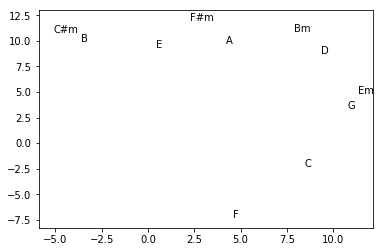

In [15]:
plot_embeddings(pca_embeddings,["A","B","C","D","E","F","G","Bm","C#m","Em","F#m"])

In [16]:
model.wv.most_similar(positive=["C"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Am', 0.5813087224960327),
 ('C/B', 0.5773550271987915),
 ('Em', 0.5757307410240173),
 ('Cadd9', 0.5067083239555359),
 ('G', 0.4938048720359802),
 ('F', 0.48986542224884033),
 ('G/B', 0.4786264896392822),
 ('Fadd9', 0.4473574161529541),
 ('C/F', 0.3991090655326843),
 ('Csus4', 0.3860374391078949)]

In [17]:
# Asus4 -A +  C = ?
model.wv.most_similar(positive=["Asus4","C"],negative=["A"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Csus4', 0.5621625185012817),
 ('Gsus4', 0.4739730656147003),
 ('Am', 0.45249634981155396),
 ('C/B', 0.42396777868270874),
 ('F', 0.42348283529281616),
 ('G/B', 0.41407307982444763),
 ('Amadd9', 0.39279454946517944),
 ('C/A#', 0.38959264755249023),
 ('Cmaj9', 0.3764427602291107),
 ('Em', 0.365997314453125)]

In [18]:
# A7 -A +  C = ?
model.wv.most_similar(positive=["A7","C"],negative=["A"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('C7', 0.4939231276512146),
 ('Am7', 0.44036632776260376),
 ('G7', 0.4199705719947815),
 ('Gm7/C', 0.4127199351787567),
 ('C/B', 0.3915141224861145),
 ('Am7/D', 0.38836607336997986),
 ('Csus4', 0.3839377760887146),
 ('Dm7/G', 0.37306979298591614),
 ('C/E', 0.36626744270324707),
 ('A7sus4', 0.3658483028411865)]

In [19]:
# C - F = ? -G (Dになってほしい)
model.wv.most_similar(positive=["C","G"],negative=["F"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Em', 0.7270631790161133),
 ('D', 0.5832318067550659),
 ('Cadd9', 0.5488811731338501),
 ('D/G', 0.5010926127433777),
 ('Bm', 0.4944051504135132),
 ('G/B', 0.4468901753425598),
 ('Gmaj9', 0.4416068196296692),
 ('D/C', 0.4088050127029419),
 ('C/B', 0.3899330794811249),
 ('Cmaj9', 0.3499351143836975)]

In [31]:
# G - C = ? - D (Aになってほしい)
model.wv.most_similar(positive=["G","D"],negative=["C"])

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Bm', 0.6755796670913696),
 ('D/C#', 0.5611920356750488),
 ('A', 0.5295631885528564),
 ('F#m', 0.5200337767601013),
 ('Gadd9', 0.5147854089736938),
 ('A/G', 0.5030473470687866),
 ('Gmaj9', 0.49371537566185),
 ('A/C#', 0.49369415640830994),
 ('BmM7', 0.4056265950202942),
 ('Gmaj7', 0.39831846952438354)]